# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 8. Библиотека matplotlib: визуализация данных

1. Классификация информации цветом, формой линий и отметок
2. Аннотации для аналитических данных
3. Многофакторный визуальный анализ
2. Работа с изображениями
5. Графики в 3D и heatmaps

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0)

### Классификация информации цветом и формой

Обратите внимание на второй параметр функции ```plot()```

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'r--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Первый вызов эквивалентен вызову функции с параметрами ```color='r', linestyle='dashed'```

In [ ]:
plt.plot(data, color='r', linestyle='dashed', label='Default')

Ознакомиться со всеми возможными стилями линий можно на сайте Matplotlib:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/linestyles.html

Можно добавить маркеры:

In [ ]:
plt.plot(data, color='r', linestyle='dotted', label='Default', marker='o')

На графики также можно наносить пояснительные надписи с указанием на те или иные точки:

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Банкротство Lehman')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Важнейшие даты кризиса 2008-2009 гг')

В задачах классификации иногда нужно представить пространственное распределение тех или иных признаков.

In [ ]:
rng = np.random.RandomState(0)
n = 30
for i, marker in enumerate(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']):
    plt.plot(rng.randn(n) + 0.2*(i % 4), rng.randn(n) - 0.05*(i % 4), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

__ЗАДАНИЕ__ Для набора данных "Ирисы" выведите графики рассеяния для комбинаций различных признаков.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

iris_data = iris[:, :-1].astype(dtype=np.float64)
iris_name = iris[:,-1]

# ваш код здесь



### Гистограммы и многофакторное сравнение

Рассмотрим на примере датасета tips.csv. Рассмотрим функции ```hist()```, ```barplot()``` и ознакомимся с базовыми возможностями пакета ```seaborn```.

In [ ]:
tips = pd.read_csv('data/tips.csv')
tips.head()

Средства для многофактороного сравнения по категориям встроены в Pandas. Посмотрим на примере распределения количества человек за одним столом в зависимости от дня недели:

In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.reindex(['Thur', 'Fri', 'Sat', 'Sun'])
party_counts = party_counts.loc[:, 2:5]  # уберем данные по столикам с 1 и 6 гостями, это редкие случаи
print(party_counts)

Вызовем из свойства ```plot``` нашего dataframe'а функцию ```bar()```:

In [ ]:
party_counts.plot.bar()

Пакет seaborn - средство более высокого уровня и в некоторых случаях берет на себя всю необходимую предообработку данных. Например, давайте посмотрим на зависимость чаевых от дня недели:

In [ ]:
tips['tips_pct'] = tips['tip'] / tips['total_bill']

In [ ]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h')

А теперь - процент чаевых не только ото дня, но и от времени суток, для этого введем еще один параметр ```hue``` (цвет).

In [ ]:
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h')

Если нам нужно вывести дополнительные показатели, можем воспользоваться фасетной сеткой, которую также предоставляет нам seaborn. Отчет по тому же самому + признак "стол курящий/некурящий".

In [ ]:
sns.catplot(x='day', y='tips_pct', hue='time', col='smoker',
               kind='bar', data=tips)

Такую "сетку" можно распространить на все категороиальные признаки:

In [ ]:
sns.catplot(x='day', y='tips_pct', row='time',
               col='smoker',
               kind='bar', data=tips)

__ЗАДАНИЕ__ Выведите на экран зависимости процента чаевых от пола, времени и дня недели.

In [ ]:
# ваш код здесь

Вернемся к нашим девушкам из журнала Playboy:

In [ ]:
df_playboy = pd.read_csv('data/girls.csv')
df_playboy.head()

In [ ]:
sns.pairplot(df_playboy, vars=['Height', 'Weight', 'Bust', 'Waist', 'Hips'], diag_kind='kde', plot_kws={'alpha': 0.2})

### Работа с графическими изображениями

Выведем фото девушки месяца за ноябрь 1972 года.

In [ ]:
import matplotlib.image as mpimg
lena = mpimg.imread('data/lena.jpg')


In [ ]:
plt.imshow(lena)

In [ ]:
lena.shape

In [ ]:
lena

Построим гистограмму распределения яркостей, для этого приведем "Лену" в одноканальный вариант:

In [ ]:
lena_gray = (np.sum(lena, axis=2) / 3)
plt.imshow(lena_gray, cmap='gray')

Теперь по всему множеству пикселей построим гистограмму их интенсивности:

In [ ]:
plt.hist(lena_gray.ravel(), bins=50)
plt.show()

__ЗАДАНИЕ__ На одной иллюстрации выведите изображение всех трех каналов R G B и постройте гистограммы для каждого канала. Подсказка: используйте ```plt.subplots(2,3)```

In [ ]:
# ваш код здесь




### 3D-графики

Возможно, что для их построения придется доустановить некоторые модули.

Точно также создаем ```axes```:

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

3-е измерение функции строится поверх конструкции ```meshgrid```, которая по сути является координатной сеткой для каждой точки функции.


In [ ]:
x = np.arange(1, 5).astype(dtype=np.float64)
y = np.arange(7, 4, -1).astype(dtype=np.float64)
XY = np.meshgrid(x, y)
XY

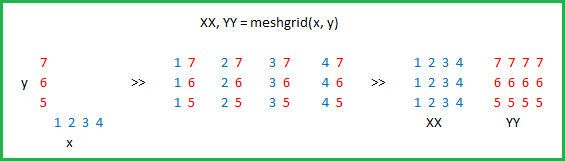

In [ ]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Контуры поверхности строятся функциями ```ax.contour3D(X, Y, Z)```, ```plot_surface(X, Y, Z)```, ```plot_wireframe(X, Y, Z)``` и многими другими.

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.plot_surface(X, Y, Z)
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Также можно делать "температурные карты" - heatmaps, используя встроенные в ```matplotlib``` цветовые схемы. Проиллюстрируем это на примере с параболоидом:

In [ ]:
# создаем параболоид
m = 3
n = 2
b = 1
d = 0.75
def f(x, y):
    return (x + m) ** 2 + (y * d + n) ** 2 + b

x = np.linspace(-6-m, 6-m, 100)
y = np.linspace(-6-n, 6-n, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [ ]:
cm = plt.cm.get_cmap('viridis')
plt.scatter(X, Y, c=Z, cmap=cm)
plt.colorbar()
plt.show()

Также эти данные можно визуализировать горизонталями:

In [ ]:
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Можно комбинировать оба способа:

In [ ]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z, )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

__ЗАДАНИЕ__ 

На примере данных, сгенерированных функцией $z = (x + m)^2 + (y + n)^2 + b$ (параболоид) сделайте срезы по случайным значениям x, y, z, отобразите их в виде графиков. 

Реализуйте функцию градиентного спуска в трехмерном пространстве на этих данных.  Проиллюстрируйте ее векторами на проекции на плоскость $XY$.

In [ ]:
m = 3
n = 2
b = 1
def f(x, y):
    return (x + m) ** 2 + (y + n) ** 2 + b
# ваш код здесь